<a href="https://colab.research.google.com/github/Nischit-Stha/py_classes/blob/main/datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Create a NumPy array
my_array = np.array([1, 2, 3, 4, 5])

# Print the array
print("My array:", my_array)

# Calculate the mean of the array
mean_value = np.mean(my_array)
print("Mean:", mean_value)


#Other operations
print("Sum:", np.sum(my_array))
print("Standard Deviation:", np.std(my_array))

My array: [1 2 3 4 5]
Mean: 3.0
Sum: 15
Standard Deviation: 1.4142135623730951


In [ ]:
import numpy as np

# Create a 2D array
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]])
print("\n2D Array:\n", my_2d_array)

# Accessing elements
print("\nElement at row 1, column 2:", my_2d_array[1, 2]) # remember 0 based indexing

# Array shape
print("\nShape of 2D array:", my_2d_array.shape)

# Array Reshaping
reshaped_array = my_2d_array.reshape(3, 2)
print("\nReshaped Array:\n", reshaped_array)

# Array operations
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

print("\nArray addition:", array1 + array2)
print("\nArray multiplication:", array1 * array2)  # Element-wise multiplication

# Dot product
print("\nDot product:", np.dot(array1, array2))

# Create an array of zeros
zeros_array = np.zeros((2, 3))
print("\nZeros Array:\n", zeros_array)

# Create an array of ones
ones_array = np.ones((3, 2))
print("\nOnes Array:\n", ones_array)

# Generating sequences
sequence_array = np.arange(0, 10, 2) # Start, stop, step
print("\nSequence Array:", sequence_array)


# Random numbers
random_array = np.random.rand(3,3) # uniform distribution between 0 and 1
print("\nRandom Array:\n", random_array)


random_int_array = np.random.randint(1,10, size=(2,2)) # random integers
print("\nRandom integer array:\n", random_int_array)


2D Array:
 [[1 2 3]
 [4 5 6]]

Element at row 1, column 2: 6

Shape of 2D array: (2, 3)

Reshaped Array:
 [[1 2]
 [3 4]
 [5 6]]

Array addition: [5 7 9]

Array multiplication: [ 4 10 18]

Dot product: 32

Zeros Array:
 [[0. 0. 0.]
 [0. 0. 0.]]

Ones Array:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]

Sequence Array: [0 2 4 6 8]

Random Array:
 [[0.73740655 0.0441551  0.82302559]
 [0.44130437 0.38995413 0.74835477]
 [0.12918342 0.11009648 0.8042141 ]]

Random integer array:
 [[3 9]
 [2 3]]


In [ ]:
#create 2 arry one random value form 0 to 100 and anoter manual value and size of both should bbe 7
random_data = np.random.randint(0,100,7)
print(random_data)

number = input("Give me number seprated by comma")
nums = number.split(",")

nums = [int(num) for num in nums]

thirdsum= random_data[2] + nums[-5]
print(thirdsum)


[73 67 25 30 15 87 91]
Give me number seprated by comma1,2,3,4,5,6,7
28


In [ ]:
arr= ([1,2,3,4,5,6,7])
print(arr)
print(np.min(arr))
print(np.max(arr))
print(np.average(arr))

[1, 2, 3, 4, 5, 6, 7]
1
7
4.0


In [ ]:
print("hello world")

hello world


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', parse_dates=['Date'])
print("This will print 5 datas form top ")
print(df.head())
print("This will print 5 datas form bottom ")
print(df.tail())

# ---------------------
# Basic Data Exploration
# ---------------------
# Check the structure of the dataset.
# - info(): Provides an overview of columns, data types, and non-null counts.
# print("\n--- Dataset Information ---")
# print(df.info())

# Summary statistics for numerical columns.
# - describe(): Calculates count, mean, std, min, max, and quartiles.
# print("\n--- Summary Statistics ---")
# print(df.describe())

# Check for missing values.
# - isnull().sum(): Counts missing values in each column.
# print("\n--- Missing Values Check ---")
# print(df.isnull().sum())

# ---------------------
# Data Wrangling and Analysis
# ---------------------

# Add a new column for daily returns.
# - pct_change(): Calculates the percentage change between consecutive rows.
# pct_change= current-previous/previous

df["daily_return"] = df.groupby('Symbol')['Close'].pct_change()
print(df)

# # Add a column for the 30-day moving average.
# # - Rolling mean smoothens data and shows trends over time.
df['30_Day_MA'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# # Add a column for 30-day volatility (standard deviation of daily returns).
df['Volatility'] = df.groupby('Symbol')['daily_return'].transform(lambda x: x.rolling(window=30).std())
# print(df)
# # Display the first few rows of the updated DataFrame.
# print("\n--- Updated Dataset with Calculations ---")
# print(df.head(10))

# # ---------------------
# # Performance Metrics
# # ---------------------
# # Calculate aggregate performance metrics for each stock.
performance_metrics = df.groupby('Symbol').agg({
    'Close': ['last', 'mean'],
    'daily_return': ['mean', 'std'],
    'Volume': 'mean'
}).reset_index()

print(performance_metrics)
# # Flatten multi-level column names.
performance_metrics.columns = ['Symbol', 'Last_Price', 'Avg_Price', 'Avg_Daily_Return', 'Return_Volatility', 'Avg_Volume']
print(performance_metrics)

# # Add a Sharpe Ratio column.
performance_metrics['Sharpe_Ratio'] = performance_metrics['Avg_Daily_Return'] / performance_metrics['Return_Volatility']

# # Rank stocks by performance.
performance_metrics['Rank'] = performance_metrics['Sharpe_Ratio'].rank(ascending=False)

# print("\n--- Performance Metrics ---")
print(performance_metrics)

# # ---------------------
# # Visualization
# # ---------------------
# # Plot closing prices over time.
plt.figure(figsize=(12, 6))
for symbol in df['Symbol'].unique():
    stock_data = df[df['Symbol'] == symbol]
    plt.plot(stock_data['Date'], stock_data['Close'], label=symbol)

# plt.title('Stock Closing Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig('closing_prices_over_time.png')
# plt.show()

# # Boxplot for daily returns.
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Symbol', y='Daily_Return', data=df)
# plt.title('Distribution of Daily Returns by Stock')
# plt.xlabel('Stock Symbol')
# plt.ylabel('Daily Return')
# plt.tight_layout()
# plt.savefig('daily_returns_boxplot.png')
# plt.show()

# # ---------------------
# # Export Processed Data
# # ---------------------
# # Save the updated dataset and performance metrics to CSV files.
df.to_csv('processed_stock_data.csv', index=False)
performance_metrics.to_csv('performance_metrics.csv', index=False)
print("\nProcessed data and performance metrics saved.")


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
import pandas as pd
data = {
    "Name":["Ramesh", "Prakash", "Roshni"],
    "Age": [10, 20, 30],
    "Salary": [100, 150, None]
}

df = pd.DataFrame(data)
print(df)
# df['Salary'].mean()
# df['Salary'].std()
df['Salary'].max()
# df.isnull()
# df['Salary'].fillna(df['Salary'].mean(), inplace=True)
# df
# average = df['Salary'].mean()
# df['Salary'].fillna(average, inplace=True)
# df
# df['Salary'].fillna(df['Salary'].mode()[0], inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df

df['canVote'] = df['Age'] >= 18
df

print(df)

# Employee Salary

# Name Age Salary

df['temporary'] = df['Age']* df['Salary']


      Name  Age  Salary
0   Ramesh   10   100.0
1  Prakash   20   150.0
2   Roshni   30     NaN
      Name  Age  Salary  canVote
0   Ramesh   10   100.0    False
1  Prakash   20   150.0     True
2   Roshni   30   125.0     True


<ipython-input-9-1dff12838e3e>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].mean(), inplace=True)


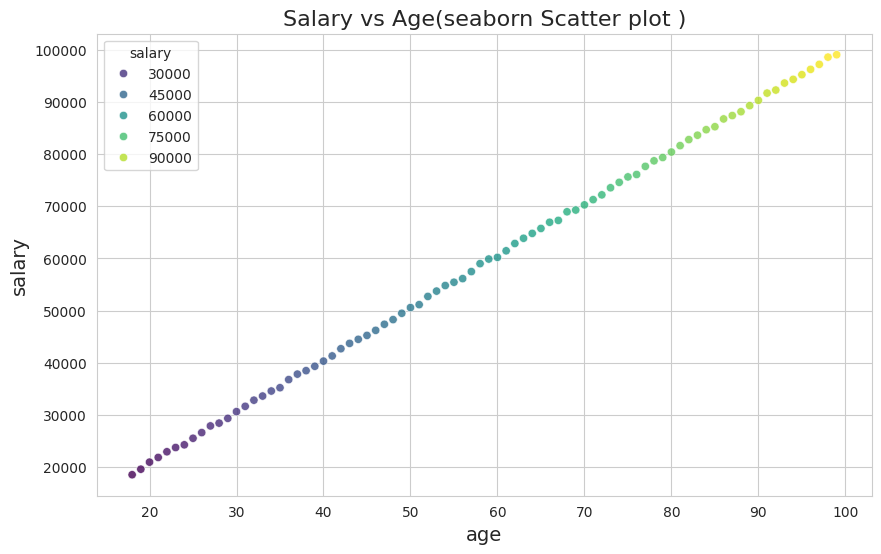

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd
data={
    "age" : [ i  for i in range(18,100)],
    "salary": [i*1000+ random.randint(100,1000) for i in range (18,100)]
}
df = pd.DataFrame(data)
df.head()
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='salary', data=df, hue='salary', palette='viridis', alpha=0.8)
plt.title('Salary vs Age(seaborn Scatter plot )', fontsize=16)
plt.xlabel( 'age', fontsize= 14)
plt.ylabel( 'salary', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data={
    'marks': [i for i in range (40,100)] ,
    'homework': [i*0.1+2 for i in range (40,100)]
}
import matplotlib.pyplot as plt

df =pd.DataFrame(data)
df.head()
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.xlabel('Marks', fontsize=14)
plt.ylabel('Homework', fontsize=14)
plt.title("marks vs homework")
plt.scatter(df['marks'], df['homework'])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabel'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data={
    'marks': [i for i in range (40,100)] ,
    'homework': [i*0.1+2 for i in range (40,100)]
}
import matplotlib.pyplot as plt

df =pd.DataFrame(data)
df.head()
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.xlabel('Marks', fontsize=14)
plt.ylabel('Homework', fontsize=14)
plt.title("marks vs homework")
plt.scatter(df['marks'], df['homework'])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabel'

<Figure size 1000x600 with 0 Axes>

In [ ]:
from scipy import stats
#sample data
group1=[20,22,23,25,27]
group2=[30,31,32,35,37]
# group1=[75,80,85,90,95]
# group2=[60,65,70,80,85]
#perform a t-test
t_stat,p_value=stats.ttest_ind(group1,group2)
#interpretation
#if pvalue is less than 5%
if p_value <0.05:
  print("Reject the null hypothesis - significant difference between groups")
else:
  print("failed to reject he null hypothesis")
  print(t_stat)
  print(p_value)